In [152]:
import os

path = os.getcwd()

print("Currently at", path)


Currently at /Users/cyna/Projects/titanic


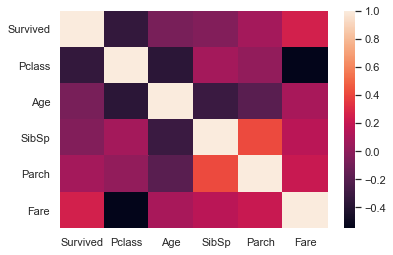

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

sns.set()

df = pd.read_csv(path+"/data/train.csv")
df.set_index("PassengerId", inplace=True)

int_columns = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]

df[int_columns] = scaler.fit_transform(df[int_columns])

# Heat Map
bx = sns.heatmap(df.corr())


In [154]:
import numpy as np

print(df.shape)

# Data Cleaning

df['Age'] = df['Age'].fillna(np.median(df['Age']))

dfRemoved = df.dropna(axis='columns')
dfRemoved = dfRemoved.drop(columns=['Ticket', 'Name'])

print(df.columns)
print(dfRemoved.columns)


(891, 11)
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [155]:

# print(df.dtypes)
# Data Processing

dfRemoved = pd.get_dummies(dfRemoved, columns=['Sex'])


In [156]:
print(dfRemoved.shape)

(891, 7)


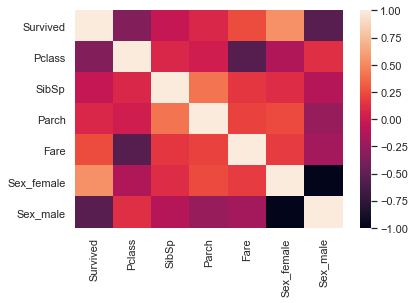

In [157]:
sns.heatmap(dfRemoved.corr())

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
logreg = LogisticRegression()
X= dfRemoved.drop('Survived', axis=1).values
print(dfRemoved.columns)
y=dfRemoved['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thres = roc_curve(y_test, y_pred_prob)

logreg.score(X_test, y_test)

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male'],
      dtype='object')


0.8022388059701493

In [163]:
# Test the code

test_df = pd.read_csv(path+"/data/test.csv")
test_df = test_df.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])
test_df['Age'] = test_df['Age'].fillna(np.median(test_df['Age']))
test_df['Fare'] = test_df['Fare'].fillna(np.mean(test_df['Fare']))
test_df = test_df.dropna(axis=1)
test_df = pd.get_dummies(test_df, columns=['Sex'])
test_df.set_index('PassengerId', inplace=True)
results = logreg.predict(test_df.values)
print(results)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [ ]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': results})
output.to_csv('my_submission.csv', index=False)
print('Your submission was successfully saved!')